## Exploring the Correlation Between Unemployment Rates and the Consumer Price Index (CPI)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px; /* title font size */
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px; /* content font size */
}
</style>


### **Introduction**
This Jupyter Notebook investigates the relationship between unemployment rates and the Consumer Price Index (CPI) across Asia, Europe, and North America. The study is motivated by the [Phillips Curve](https://en.wikipedia.org/wiki/Phillips_curve) theory, which suggests an inverse relationship between inflation rates and unemployment rates — high inflation is typically associated with low unemployment and vice versa.

Our objective is to explore whether this theory holds when comparing unemployment rates with CPI, a key measure of inflation. We aim to analyze historical data to discern how these two critical economic indicators interact, focusing on their correlation and possible implications. The analysis encompasses data collection, cleaning, and visualization, followed by statistical modeling to comprehensively understand their interconnected dynamics.

---

<h3 class="custom-heading"><b>Contributor(s)</b></h3>
<ul class="custom-spacing">
  <li>Code Originator(s): Xiaohan Kuang</li>
  <li>Code Reviewer(s): Xiaohan Kuang, Hexuan Fan, Ananya Nimbalkar, Ziji Tang</li>
  <li>Code Reviser(s): </li>
</ul>

---

<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li>This code chunk is responsible for importing all the necessary Python libraries required for data processing and visualization in our analysis of the relationship between unemployment rates and CPI. To ensure a clean output, we also suppress warnings.</li>
  <li>The <code>LOCAL_PATH</code> variable is set to point to the data folder in the current working directory. </li> 
  <li>The <code>CLEANED_PATH</code> variable is set to point to the cleaned data folder in the current working directory. </li>
  <li>The <code>RAW_PATH</code> variable is set to point to the raw data folder in the current working directory. </li>
  <li>The <code>PLOT_PATH</code> variable is set to point to the plots folder in the current working directory. </li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import geopandas
import warnings
import pycountry
import pycountry_convert as pc
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings("ignore")

LOCAL_PATH = os.getcwd() + '/data/'
CLEANED_PATH = LOCAL_PATH + '/cleaned/'
RAW_PATH = LOCAL_PATH + '/raw/'
PLOT_PATH = os.getcwd() + '/plots/'

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li>This code chunk is dedicated to loading the unemployment rate data from a CSV file and the Consumer Price Index (CPI) data from an Excel file. The filenames for these datasets are stored in <code>ue_filename</code> and <code>cpi_filename</code>, respectively.
  <li>The unemployment data is read using Pandas' <code>read_csv</code> method, while the CPI data is read using the <code>read_excel</code> method, specifying the sheet name and skipping the initial rows that do not contain data.
</ul>

In [2]:
ue_filename = 'Unemployment (%).csv'
cpi_filename = 'CPI_cleaned.xlsx'

ue_df = pd.read_csv(RAW_PATH + ue_filename)
cpi_df = pd.read_excel(CLEANED_PATH + cpi_filename)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li>In this code chunk, we first list all unique categories in the 'Disaggregation' column of the unemployment dataset to understand the different types of data available. We then select the 'total, 15+, National' category for our analysis. 
  <li>For our study, we focus on the <b>Modeled ILO Estimates</b> rather than <b>National Estimates</b> for several reasons. The <b>Modeled ILO Estimates</b> provide internationally standardized data, which are crucial for our analysis aiming at comparability across different countries. 
</ul>

In [3]:
for category in ue_df['Disaggregation'].unique():
    print(category)
research_category = 'total, 15+, Modeled'

female, 15+, Modeled
female, 15+, National
male, 15+, Modeled
male, 15+, National
total, 15+, Modeled
total, 15+, National
female, 15-24, Modeled
female, 15-24, National
male, 15-24, Modeled
male, 15-24, National
total, 15-24, Modeled
total, 15-24, National


<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  The function <code>get_continent</code> is designed to convert a country's alpha-3 code to its corresponding continent name. It utilizes the <code>pycountry</code> and <code>pycountry_convert</code> libraries to perform this conversion.
</ul>

In [4]:
def get_continent(country_code):
    try:
        # Convert alpha-3 country code to alpha-2
        country_alpha2 = pycountry.countries.get(alpha_3=country_code).alpha_2

        # Get the continent code from alpha-2 country code
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)

        # Convert continent code to continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        # Return None if the conversion fails
        return None

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li>This code block filters the unemployment data (<code>ue_df</code>) for the specified research category and adds a 'Continent' column using the <code>get_continent</code> function.
  <li>It narrows down the data to focus on years 2000 to 2022 and the continents Asia, Europe, and North America. 
  <li>It checks for missing values with <code>print(modeled_ue_df.isna().sum())</code> shows that there are no missing values in the filtered dataset.
</ul>

In [5]:
modeled_ue_df = ue_df[ue_df['Disaggregation'] == research_category].reset_index(drop=True)
modeled_ue_df['Continent'] = modeled_ue_df['Country Code'].apply(get_continent)

year_columns = [year for year in range(2000, 2023)]
interested_continents = ['Asia', 'Europe', 'North America']
modeled_ue_df = modeled_ue_df[modeled_ue_df['Continent'].isin(interested_continents)]
modeled_ue_df = modeled_ue_df[modeled_ue_df['Year'].isin(year_columns)]
print(modeled_ue_df.isna().sum())

Indicator Name    0
Indicator Code    0
Country Name      0
Country Code      0
Year              0
Value             0
Disaggregation    0
Continent         0
dtype: int64


<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li> The code extracts unique country information (name, code, continent) from <code>modeled_ue_df</code> and prepares a new DataFrame, <code>modeled_ue_2022_df</code>, initially with missing values for unemployment rates
  <li> It then filters 2022 data from <code>modeled_ue_df</code> and merges it with <code>modeled_ue_2022_df</code> to fill in the 2022 unemployment rates. For countries without 2022 data, it backfills the first available value from previous years.
</ul>

In [6]:
countries_info = modeled_ue_df[['Country Name', 'Country Code', 'Continent']].drop_duplicates()
modeled_ue_2022_df = countries_info.copy()
modeled_ue_2022_df['Value'] = pd.NA

filtered_ue_df = modeled_ue_df[modeled_ue_df['Year'] == 2022][['Country Name', 'Country Code', 'Value']]

modeled_ue_2022_df = modeled_ue_2022_df[['Country Name', 'Country Code', 'Continent']].merge(filtered_ue_df[['Country Code', 'Value']], on='Country Code', how='left')

for index, row in modeled_ue_2022_df.iterrows():
    if pd.isna(row['Value']):
        country_name = row['Country Name']
        fill_value = modeled_ue_df[modeled_ue_df['Country Name']==country_name]['Value'].values[0]
        modeled_ue_2022_df.at[index, 'Value'] = fill_value

modeled_ue_2022_df.head()

,Country Name,Country Code,Continent,Value
0,Afghanistan,AFG,Asia,11.710
1,Albania,ALB,Europe,11.808
2,Armenia,ARM,Asia,12.557
3,Austria,AUT,Europe,4.707
4,Azerbaijan,AZE,Asia,5.462


<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li> The code loads a world map from geopandas and merges it with the 2022 unemployment data (<code>modeled_ue_2022_df</code>). The map, titled 'Global Unemployment Rate(%) in 2022', uses a blue color scale to represent unemployment rates for countries in Europe, Asia, and North America, with special emphasis on rates above 8%.
  <li> Rates above 8% are indicative of high unemployment, often associated with economic challenges such as recession or industrial restructuring.
  <li> The map includes a color bar for interpreting these values, categorizing rates from 0 to >8%, and clearly outlines country boundaries.
</ul>

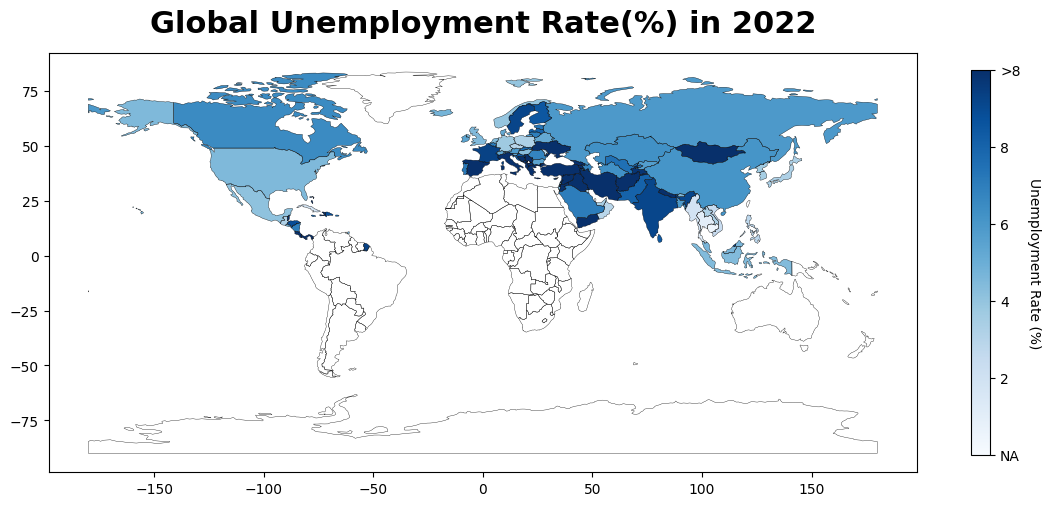

In [7]:
world_df = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

world_df = world_df.rename(columns={'iso_a3':'Country Code'})

world_merged = pd.merge(world_df, modeled_ue_2022_df, on='Country Code', how='left')

fig, ax = plt.subplots(figsize=(14,10))
plt.title('Global Unemployment Rate(%) in 2022', fontsize=22, pad=15, fontweight="bold")

world_merged.boundary.plot(ax=ax, linewidth=0.25, color='black')
world_merged.plot(column='Value', 
                  ax=ax,
                  vmin=0,
                  vmax=8, 
                  cmap='Blues')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=100))
sm._A = [] 

cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Unemployment Rate (%)',  rotation=270, labelpad=15)
cbar.ax.set_yticklabels(['NA', '2', '4', '6', '8', '>8'])
plt.savefig(PLOT_PATH + "Unemployment_rate_2022.png", dpi=300, bbox_inches='tight')
plt.show()

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li> The code filters the CPI dataset (<code>cpi_df</code>) for countries of interest identified in <code>modeled_ue_df</code>.
  <li> A 'Continent' column is added using the <code>get_continent</code> function. The columns are reordered to place 'Continent' after 'Country Code'. 
  <li> The final dataset, <code>filtered_cpi_df</code>, includes specific year columns from 2000 to 2022, along with essential metadata columns. Rows with missing values are dropped, and the index is reset for a clean dataset.
</ul>

In [8]:
# Get unique country codes from the unemployment dataset
interested_countries = modeled_ue_df['Country Code'].unique().tolist()

# Filter the CPI data for countries present in the unemployment dataset
filtered_cpi_df = cpi_df[cpi_df['Country Code'].isin(interested_countries)]

# Add 'Continent' column using the country code
filtered_cpi_df['Continent'] = filtered_cpi_df['Country Code'].apply(get_continent)

# Reordering columns to place 'Continent' after 'Country Code'
column_order = filtered_cpi_df.columns.tolist()
continent_index = column_order.index('Continent')
column_order.insert(2, column_order.pop(continent_index))
filtered_cpi_df = filtered_cpi_df[column_order]

# Define columns that are not year-specific and year columns from 2000 to 2022
non_year_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Continent']
year_columns = [str(year) for year in range(2000, 2023)] 

# Combine non-year and year columns, filter for these, and drop rows with missing data
desired_columns = non_year_columns + year_columns
filtered_cpi_df = filtered_cpi_df[desired_columns].dropna().reset_index(drop=True)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  This function <code>merge_cpi_and_ue</code> merges CPI and unemployment data into a single DataFrame.
</ul>

In [9]:
def merge_cpi_and_ue(cpi_data, ue_data):
    # Convert CPI data from wide to long format, keeping country and continent info, and reshaping years into rows
    cpi_long_df = cpi_data.melt(id_vars=['Country Name', 'Country Code', 'Continent'], 
                                var_name='Year', 
                                value_name='CPI',
                                value_vars=cpi_data.columns[5:])  # Columns from the year 2000 onwards
    cpi_long_df['Year'] = cpi_long_df['Year'].astype(int)
    ue_data['Year'] = ue_data['Year'].astype(int)

    # Merge the dataframes on 'Country Code' and 'Year'
    merged_df = pd.merge(cpi_long_df, ue_data, on=['Country Code', 'Year'], how='inner', suffixes=('_CPI', '_UE'))

    # Keep only relevant columns
    merged_df = merged_df[['Country Name_CPI', 'Country Code', 'Continent_CPI', 'Year', 'CPI', 'Value']]

    # Rename the 'Value' column to 'Unemployment Rate'
    merged_df.rename(columns={'Value': 'Unemployment Rate'}, inplace=True)
    return merged_df

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  The function <code>plot_median_cpi_and_ue</code> creates a line plot to compare the median unemployment rate and Consumer Price Index (CPI) rate from 2000 to 2022 for a given continent. It takes two datasets, <code>cpi_data</code> and <code>ue_data</code>, as inputs and calculates the median values of unemployment and CPI for each year, then plots these medians as separate lines on the graph.
</ul>

In [10]:
def plot_median_cpi_and_ue(cpi_data, ue_data):
    # Setting the plot size
    plt.figure(figsize=(12, 6))

    # Extracting the name of the continent from the CPI dataset
    continent_name = cpi_data['Continent'].unique()[0]

    # Defining the range of years for analysis
    year_columns = [str(year) for year in range(2000, 2023)]

    # Calculating the median unemployment rate per year
    yearly_average_ue = ue_data.groupby('Year').agg({'Value': 'median'})

    # Calculating the median CPI rate per year
    yearly_average_cpi = cpi_data[year_columns].median()

    # Calculating the median CPI rate per year
    plt.plot(year_columns, yearly_average_ue, marker='o', color='red', label='Median Unemployment Rate')
    
     # Plotting the median CPI rate
    plt.plot(year_columns, yearly_average_cpi, marker='o', color='blue', label='Median CPI Rate')

    # Adding vertical lines for the years 2008 and 2020
    plt.axvline(x='2008', color='green', linestyle='--', linewidth=2)
    plt.axvline(x='2020', color='green', linestyle='--', linewidth=2)
    plt.text('2008', 10, 'Global Financial Crisis', horizontalalignment='right', color='green', fontsize=12, fontweight="bold")
    plt.text('2020', 10, 'Covid-19 Pandemic', horizontalalignment='right', color='green', fontsize=12, fontweight="bold")

    plt.title(f'Median Unemployment and CPI Rates in {continent_name} (2000-2022)',  fontsize=22, pad=12, fontweight="bold")
    plt.xlabel('Year', fontsize=18,)
    plt.ylabel('Rate (%)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, 15, 2.5))
    plt.legend()

    # Caption
    if continent_name == 'Asia':
      caption = ("Figure: This line chart compares the median CPI with the unemployment rate in " 
            + continent_name + " from 2000 to 2022."
              "\nWhile a clear long-term relationship is not evident, a negative correlation becomes noticeable around major global events in 2008 and 2020.")
    
    elif continent_name == 'Europe':
       caption = ("Figure: This line chart compares the median CPI with the unemployment rate in " 
            + continent_name + " from 2000 to 2022."
              "\nA clear long-term negative relationship is evident, particularly around major global events in 2008 and 2020, where this correlation becomes more pronounced.")
    else:
       caption = ("Figure: This line chart compares the median CPI with the unemployment rate in " 
            + continent_name + " from 2000 to 2022."
              "\nA long-term relationship is not evident, but in multiple short terms, a negative correlation is observed."
              "\nhis correlation is most pronounced particularly around major global events in 2008 and 2020.")
    plt.figtext(0.5, -0.1, caption, ha='center', va='center', fontsize=16, wrap=True)

    plt.grid(True)
    plt.tight_layout()
    plt.savefig(PLOT_PATH + f"median_cpi_and_unemployment_rate_in_{continent_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  The function <code>plot_cpi_ue_scatter</code> generates a scatter plot to compare CPI and unemployment rates across a specific continent. It plots countries (color-coded by country code) with CPI on the x-axis and unemployment rates on the y-axis.
</ul>

In [11]:
def plot_cpi_ue_scatter(df):
    # Extract the continent name for the title
    continent_name = df['Continent_CPI'].unique()[0]
    # Setting up the plot size
    plt.figure(figsize=(12, 6))

    # Creating a scatter plot with CPI on x-axis and unemployment rate on y-axis
    sns.scatterplot(data=df, 
                    x='CPI', 
                    y='Unemployment Rate', 
                    hue='Country Code', 
                    palette='viridis', 
                    legend=False, 
                    s=100, 
                    alpha=0.8,
                    edgecolor=None)
    sns.regplot(data=df, x='CPI', y='Unemployment Rate', scatter=False, color='blue')

    plt.title(f'Scatterplot of CPI and Unemployment Rate Across {continent_name} Countries', 
              fontsize=22, 
              pad=12, 
              fontweight="bold")
    plt.xlabel('CPI (Annual %)', fontsize=18,)
    plt.ylabel('Unemployment Rate (%)', fontsize=18, )
    plt.grid(True)

    # Caption
    if continent_name == 'Asia':
      caption = ("Figure: This scatter plot displays the relationship between the CPI and unemployment rate for various countries in " + continent_name + " across multiple years."
                 "\nNo clear general pattern can be discerned from this plot, highlighting the diverse economic dynamics within the region.")
    elif continent_name == 'Europe':
       caption = ("Figure: This scatter plot displays the relationship between the CPI and unemployment rate for various countries in " + continent_name + " across multiple years."
                  "\nNo clear general pattern can be discerned from this plot, highlighting the diverse economic dynamics within the region.")
    else:
       caption = ("Figure: This scatter plot displays the relationship between the CPI and unemployment rate for various countries in " + continent_name + " across multiple years."
                  "\nA general negative correlation is observed, as indicated by the regression line.")
    plt.figtext(0.5, -0.1, caption, ha='center', va='center', fontsize=16, wrap=True)
    plt.savefig(PLOT_PATH + f"cpi_and_unemployment_rate_scatterplot_in_{continent_name}.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  The code segments the CPI and unemployment data into three separate DataFrames based on continent: Asia, Europe, and North America. For each continent, it filters the <code>filtered_cpi_df</code> and <code>modeled_ue_df</code> DataFrames to include only the data corresponding to that particular continent.
</ul>

In [12]:
# Segregating CPI data by continent
cpi_data_asia = filtered_cpi_df[filtered_cpi_df['Continent'] == 'Asia']
cpi_data_europe = filtered_cpi_df[filtered_cpi_df['Continent'] == 'Europe']
cpi_data_north_america = filtered_cpi_df[filtered_cpi_df['Continent'] == 'North America']

# Segregating unemployment data by continent
ue_data_asia = modeled_ue_df[modeled_ue_df['Continent'] == 'Asia']
ue_data_europe = modeled_ue_df[modeled_ue_df['Continent'] == 'Europe']
ue_data_north_america = modeled_ue_df[modeled_ue_df['Continent'] == 'North America']

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li> The code calls <code>plot_median_cpi_and_ue</code> to plot the median CPI and unemployment rates in Asia.
  <li> The code merges the CPI and unemployment datasets specific to Asia using <code>merge_cpi_and_ue</code>, storing the result in <code>merged_asia_df</code>. And it visualizes the relationship between CPI and unemployment rates in Asia using <code>plot_cpi_ue_scatter</code> with the merged data.
</ul>

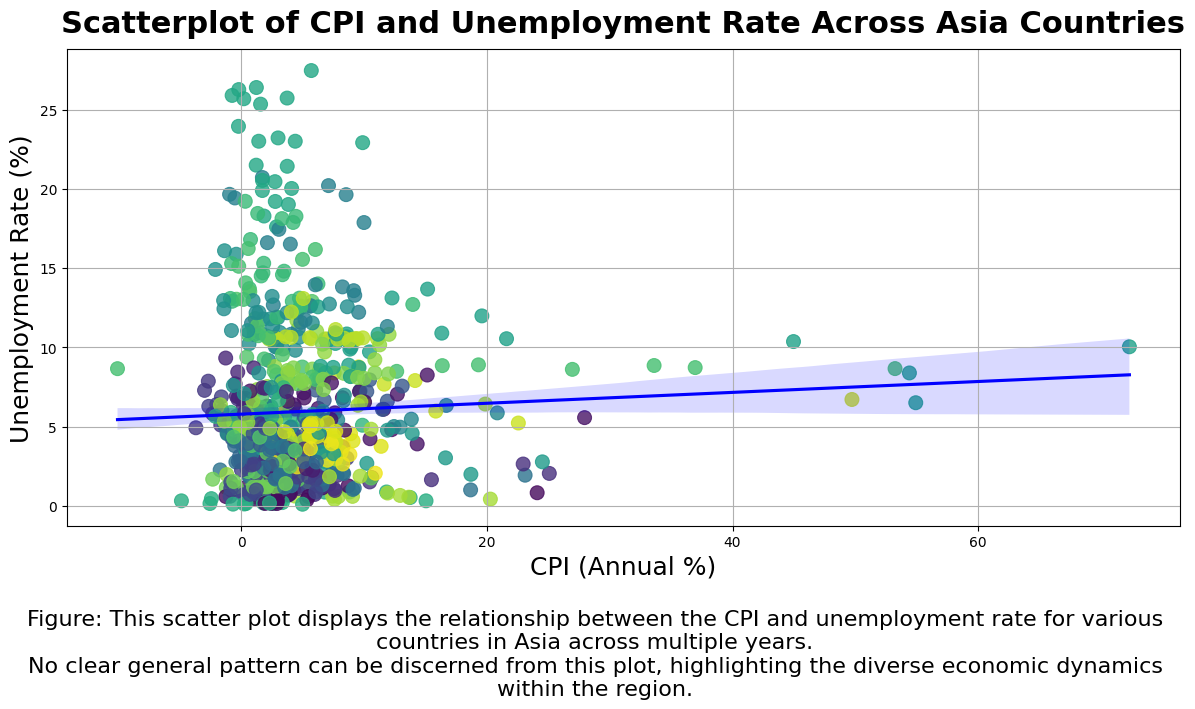

In [13]:
# Merging CPI and unemployment data for Asia
merged_asia_df = merge_cpi_and_ue(cpi_data_asia, ue_data_asia)

# Scatter plot for CPI vs Unemployment Rate in Asia
plot_cpi_ue_scatter(merged_asia_df)

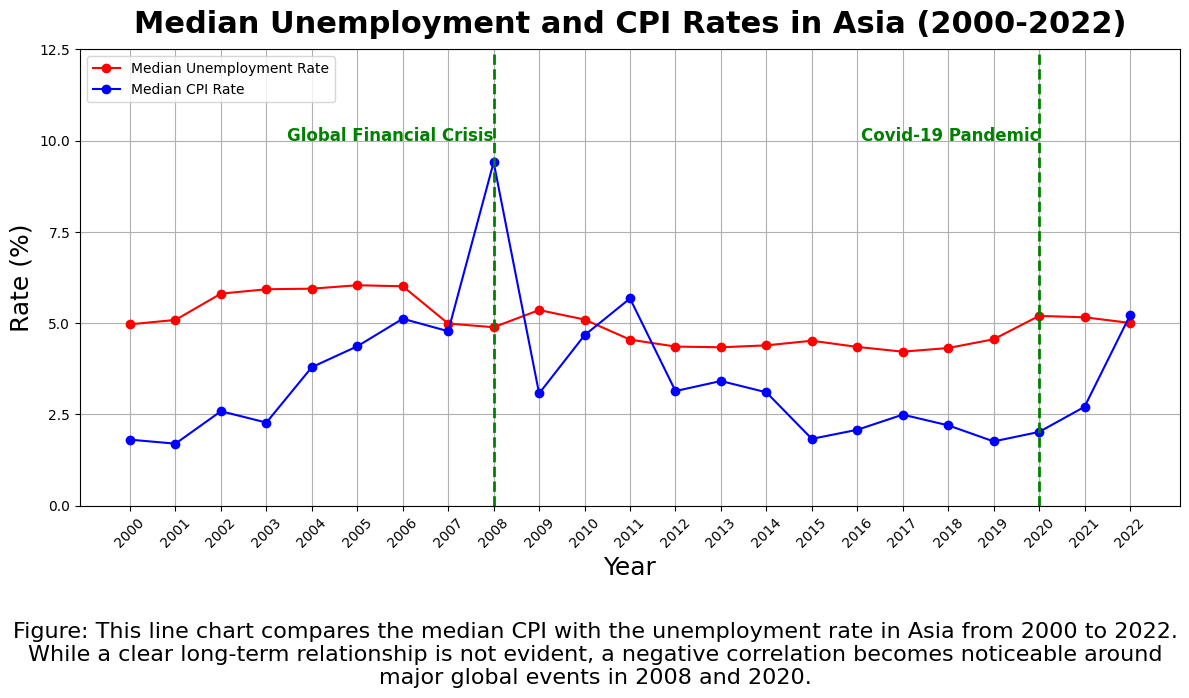

In [14]:
# Plotting median CPI and unemployment rates for Asia
plot_median_cpi_and_ue(cpi_data_asia, ue_data_asia)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li> The code calls <code>plot_median_cpi_and_ue</code> to plot the median CPI and unemployment rates in Europe.
  <li> The code merges the CPI and unemployment datasets specific to Europe using <code>merge_cpi_and_ue</code>, storing the result in <code>merged_europe_df</code>. And it visualizes the relationship between CPI and unemployment rates in Asia using <code>plot_cpi_ue_scatter</code> with the merged data.
</ul>

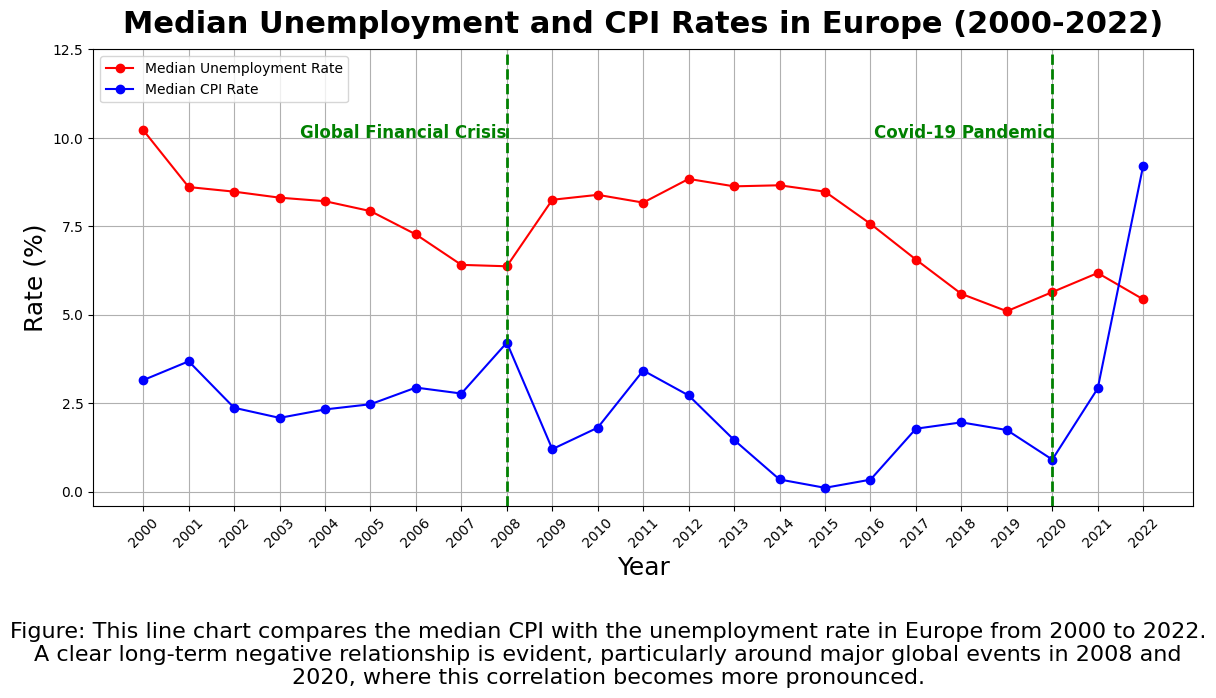

In [15]:
# Plotting median CPI and unemployment rates for Europe
plot_median_cpi_and_ue(cpi_data_europe, ue_data_europe)

# Merging CPI and unemployment data for Europe
merged_europe_df = merge_cpi_and_ue(cpi_data_europe, ue_data_europe)

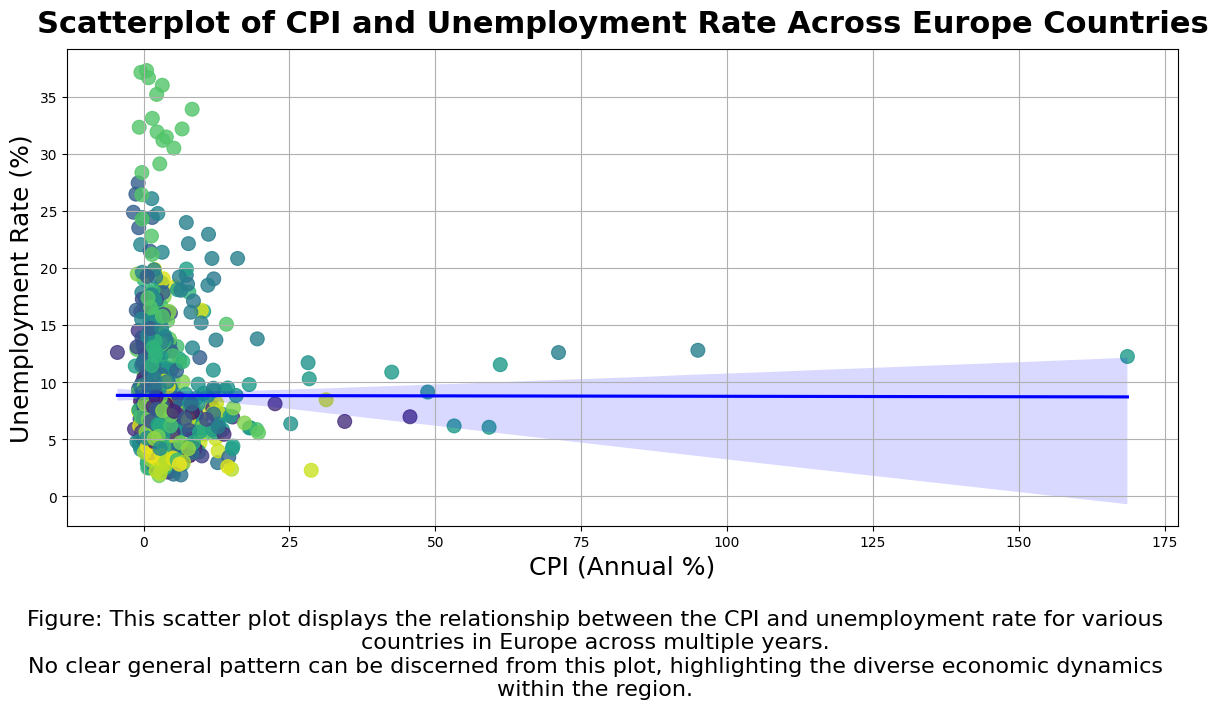

In [16]:
# Scatter plot for CPI vs Unemployment Rate in Europe
plot_cpi_ue_scatter(merged_europe_df)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li> The code calls <code>plot_median_cpi_and_ue</code> to plot the median CPI and unemployment rates in North America.
  <li> The code merges the CPI and unemployment datasets specific to North America using <code>merge_cpi_and_ue</code>, storing the result in <code>merged_north_america_df</code>. And it visualizes the relationship between CPI and unemployment rates in Asia using <code>plot_cpi_ue_scatter</code> with the merged data.
</ul>

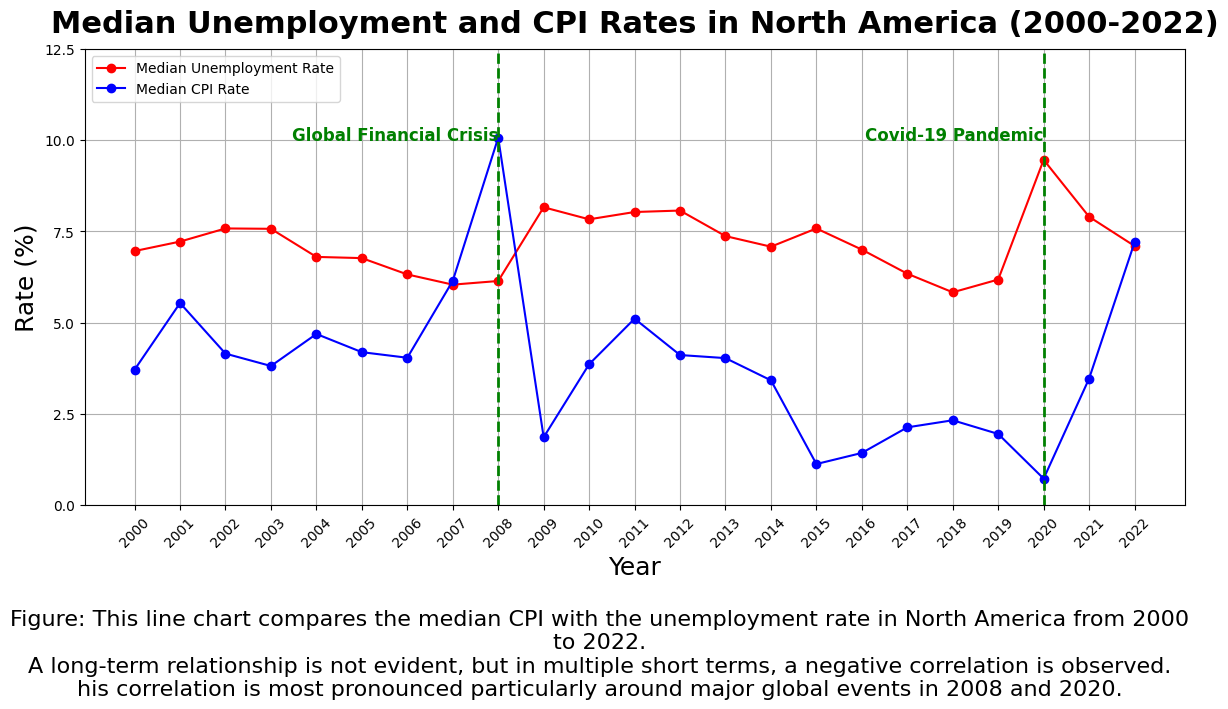

In [17]:
# Plotting median CPI and unemployment rates for North America
plot_median_cpi_and_ue(cpi_data_north_america, ue_data_north_america)

# Merging CPI and unemployment data for North America
merged_north_america_df = merge_cpi_and_ue(cpi_data_north_america, ue_data_north_america)

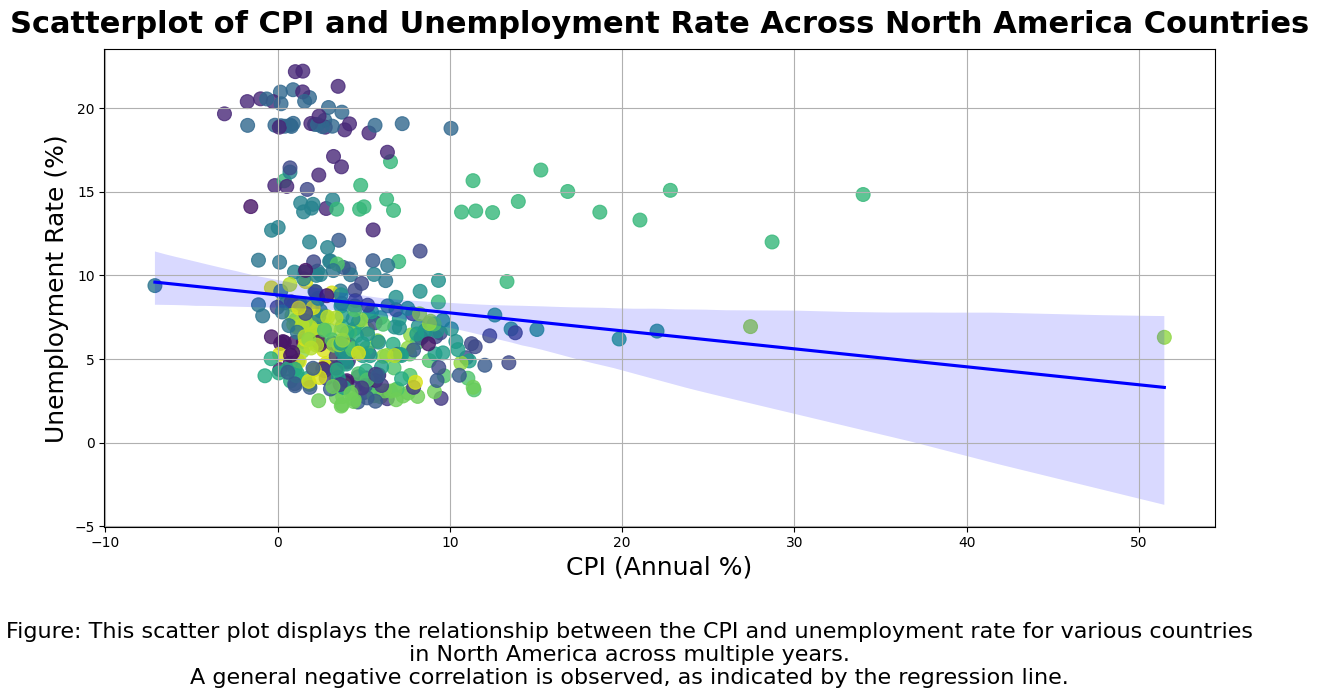

In [18]:
# Scatter plot for CPI vs Unemployment Rate in North America
plot_cpi_ue_scatter(merged_north_america_df)

---

### **Phase Summary**
Our investigation into the relationship between the unemployment rate and the Consumer Price Index (CPI) across various continents yielded mixed results. We observed a general negative correlation in line plots showing median CPI and unemployment rates yearly. This pattern, however, was inconsistent across different regions and timeframes.

**Key Observations:**
1. **Regional Variations**: In Asia, the median unemployment rate remained relatively stable despite changes in CPI, indicating a weak or unclear relationship. Conversely, in Europe and North America, we noted a general negative correlation - as CPI increased, unemployment rates tended to decrease. This trend was more pronounced in some years but wasn't consistently observed from 2000 to 2022.

2. **Temporal Inconsistencies**: The negative correlation aligns with the short-term implications of the Phillips Curve, where lower unemployment often correlates with higher inflation. However, this relationship seems to fluctuate over the long term, with certain years showing clear negative correlation and others not following the expected pattern.

3. **Scatter Plot Analysis**: Merging CPI and unemployment data for each country and year revealed that the scatter plots did not consistently show a clear negative correlation across continents.

4. **Impact of Global Events**: In the line plots, two vertical green dashed lines mark the years 2008 and 2020, signifying the global financial crisis and the COVID-19 pandemic, respectively. Across Asia, Europe, and North America, these global events led to significant fluctuations in both CPI and unemployment rates. Post-2008, there was a notable decrease in CPI and a corresponding increase in unemployment rates across these continents, reflecting the impact of the financial crisis. Conversely, in 2020, during the COVID-19 pandemic, we observe a sharp rise in CPI and a general downward trend in unemployment rates, suggesting complex economic responses to the pandemic.

**Possible Reasons for Observations:**
1. **Cultural and Policy Differences**: The disparity between Asia, and Europe and North America might be attributed to cultural or governmental policy differences.

2. **Outliers and Data Complexity**: Extreme values in both CPI and unemployment rates may have affected the analysis. Additionally, the CPI's fluctuations are influenced by numerous factors beyond unemployment rates, complicating the correlation analysis.

3. **Complex Influences on CPI**: The unemployment rate might impact CPI, but it alone cannot fully explain CPI fluctuations in the long run, as CPI is subject to a variety of other influencing factors.

**Future Focus:**
We plan to narrow our focus to representative countries in each continent — China, Japan, and Korea for Asia; Germany, France, and Italy for Europe; and the USA, Canada, and Mexico for North America. This targeted approach will help us examine if a more distinct and convincing correlation exists within these countries.
